In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive/AI_in_IOT

/content/drive/MyDrive/AI in IOT


In [3]:
ls

coco.names  image3.jpeg  image.jpg  yolov4.cfg  yolov4.weights


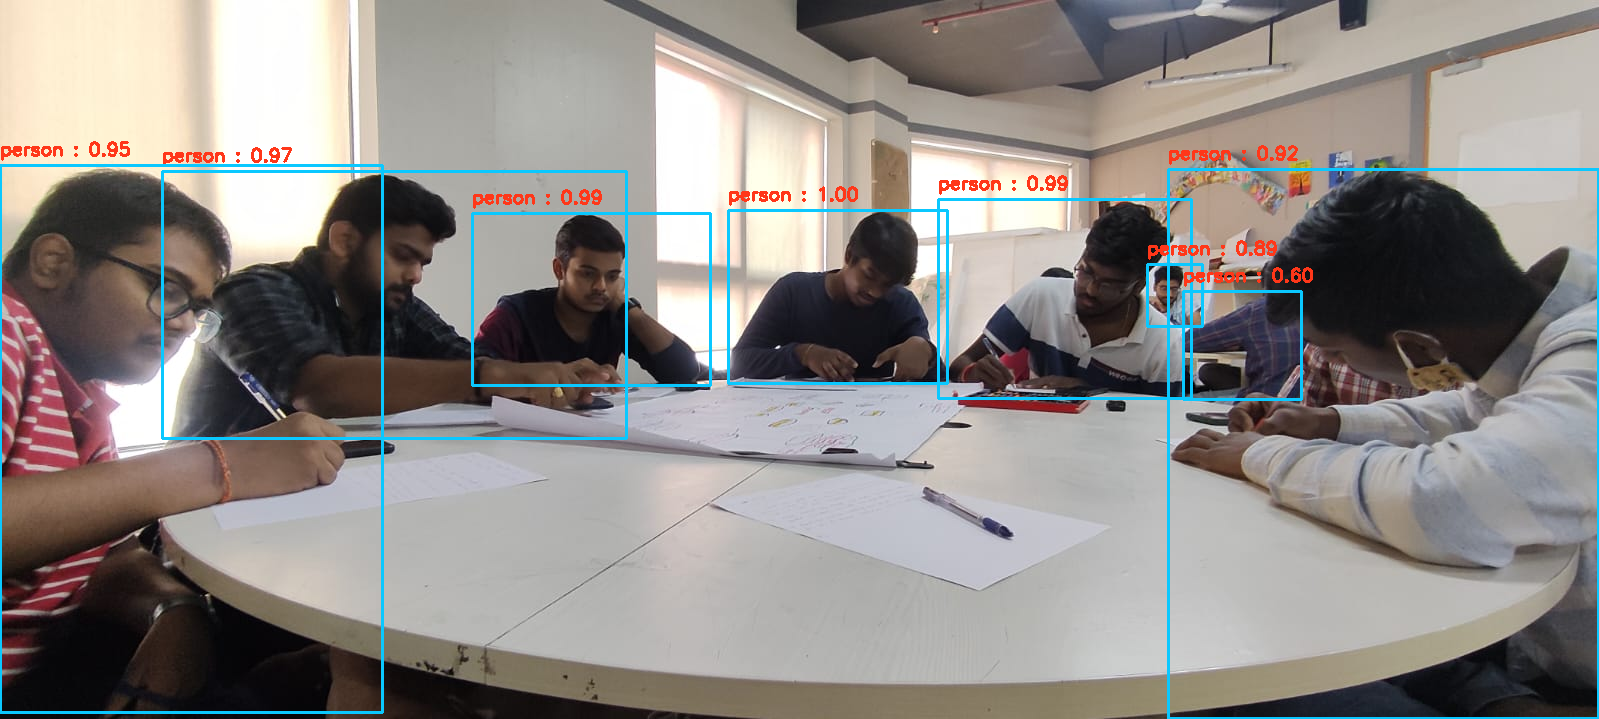

In [13]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

def detect_objects(image_path):
    confidence_threshold = 0.6
    nms_threshold = 0.3

    class_names = []
    with open("coco.names", "r") as f:
        class_names = [cname.strip() for cname in f.readlines()]

    img = cv2.imread(image_path)
    arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
    arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
    arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

    model = cv2.dnn_DetectionModel(arc)
    model.setInputParams(size=(640, 640), scale=1/255, swapRB=True)

    classes, scores, boxes = model.detect(img, confidence_threshold, nms_threshold)

    for (classid, score, box) in zip(classes, scores, boxes):
        label = "%s : %.2f" % (class_names[classid], score)
        if class_names[classid] == "person":
            cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
            cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

    cv2_imshow(img)

if __name__ == "__main__":
    image_path = "/content/drive/MyDrive/AI_in_IOT/WhatsApp_Image.jpg"
    detect_objects(image_path)
